<a href="https://colab.research.google.com/github/Geetika-Madan/Linear_Regression/blob/master/Linear_Regression__Model_Project_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and understanding the overall outlook of Data

In [ ]:
day = pd.read_csv('day.csv')
print(day.shape)
print(day.columns)
day.head()

(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
day = day.drop(['instant','casual','registered','dteday'], axis = 1)
print(day.columns)
print(day.shape)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
(730, 12)


### Visualizing the Data  : 
NUMERIC VARIABLES PAIRPLOT 

In [ ]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

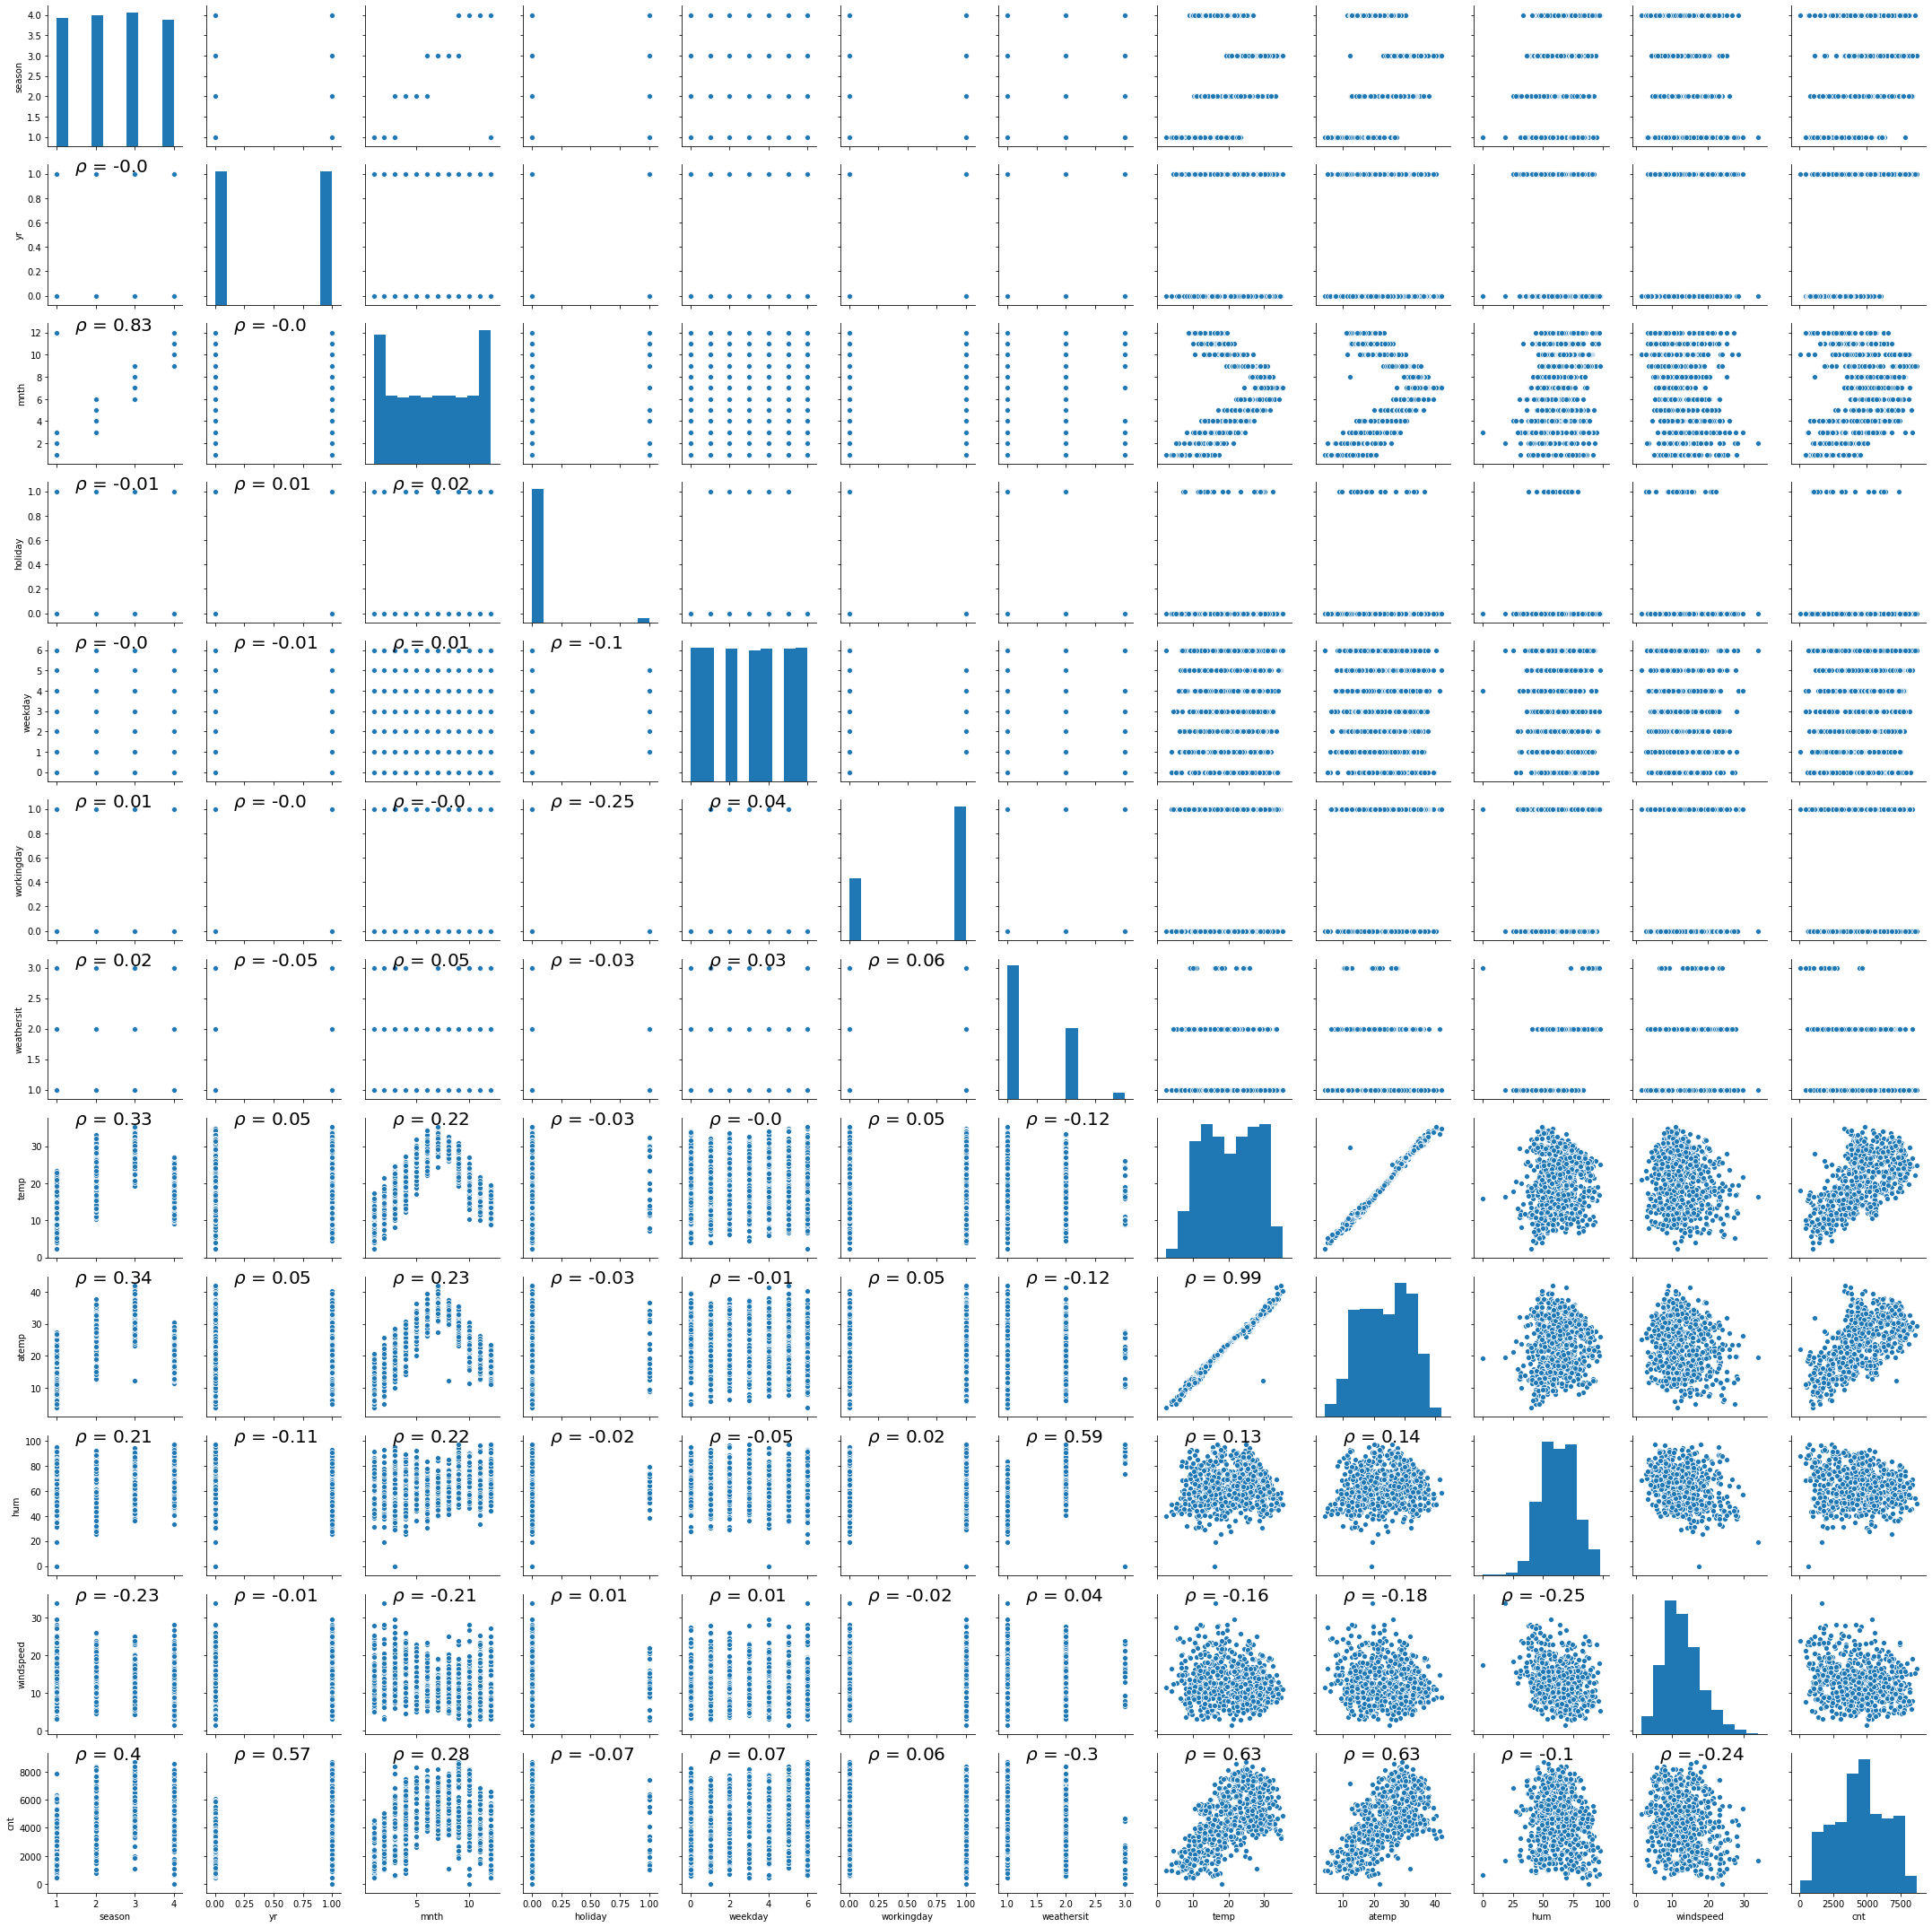

In [ ]:
pp = sns.pairplot(day)
pp.map_lower(corr)
plt.show()

#### y variable = cnt : corelated with temp and a temp
#### temp and atemp are highly correlated 


### VISUALIZATION OF CATEGORICAL VARIABLES :

In [ ]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


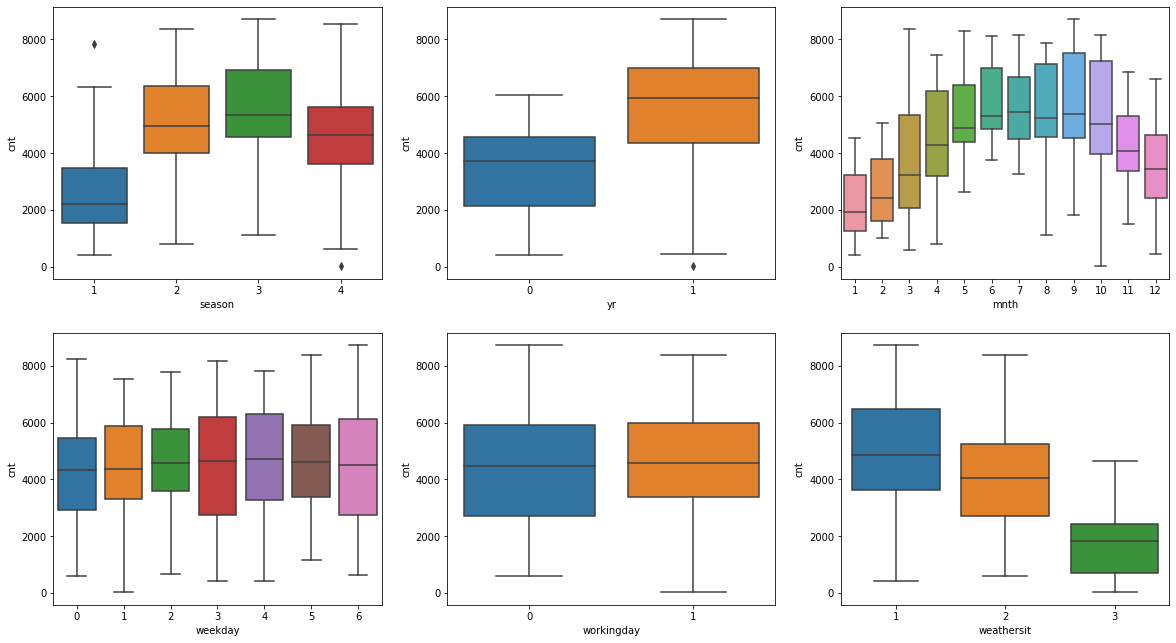

In [ ]:
plt.figure(figsize=(20, 17))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

### Year, 2019 :1, has more counts

### Data Preparation :

In [ ]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
print(day['season'].value_counts())
print(day['yr'].value_counts())
print(day['mnth'].value_counts())
print(day['weekday'].value_counts())
print(day['workingday'].value_counts())
print(day['weathersit'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [ ]:
day['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
season_dummy_1 = pd.get_dummies(day['season'], drop_first = False)

In [ ]:
season_dummy_1

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


In [ ]:
def season_to_text(argument):
    switcher = {         
         1:'spring',
         2:'summer',
         3:'fall',
         4:'winter'
    }
    return switcher.get(argument, "")
day['season']=day.apply (lambda row: season_to_text(row['season']),axis=1)
print(day['season'].unique())

def yr_to_numb(argument):
    switcher = {         
         0:2018,
         1:2019,        
    }
    return switcher.get(argument, "")
day['yr']=day.apply (lambda row: yr_to_numb(row['yr']),axis=1)
print(day['yr'].unique())

def mnth_to_text(argument):
    switcher = {         
         1:'January',
         2:'February',
         3:'March',
         4:'April',
         5:'May',
         6:'June',
         7:'July',
         8:'August',
         9:'September',
        10:'October',
        11:'November',
        12:'December'
    }
    return switcher.get(argument, "")
day['mnth']=day.apply (lambda row: mnth_to_text(row['mnth']),axis=1)
print(day['mnth'].unique())

def weekday_to_text(argument):
    switcher = {
         0:'Monday',
         1:'Tuesday',
         2:'Wednesday',
         3:'Thursday',
         4:'Friday',
         5:'Saturday',
         6:'Sunday'
    }
    return switcher.get(argument, "")
day['weekday']=day.apply (lambda row: weekday_to_text(row['weekday']),axis=1)
print(day['weekday'].unique())

def workingday_to_text(argument):
    switcher = {         
         1:'working',
         0:'weekend/holiday',         
    }
    return switcher.get(argument, "")
day['workingday']=day.apply (lambda row: workingday_to_text(row['workingday']),axis=1)
print(day['workingday'].unique())

def weathersit_to_text(argument):
    switcher = {         
         1:'Clear',
         2:'Mist + Cloudy',
         3:'Light Snow Light Rain + Thunderstorm',
         4:'Heavy Rain + Ice Pallets'
    }
    return switcher.get(argument, "")
day['weathersit']=day.apply (lambda row: weathersit_to_text(row['weathersit']),axis=1)
print(day['weathersit'].unique())

['spring' 'summer' 'fall' 'winter']
[2018 2019]
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
['weekend/holiday' 'working']
['Mist + Cloudy' 'Clear' 'Light Snow Light Rain + Thunderstorm']


In [ ]:
day_test = day

### Dummy Encoding :

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [ ]:
print('shape before creating dummies : ',day.shape)
season_dummy = pd.get_dummies(day['season'], drop_first = True)
day = pd.concat([day, season_dummy], axis = 1)
yr_dummy = pd.get_dummies(day['yr'], drop_first = True)
day = pd.concat([day, yr_dummy], axis = 1)
mnth_dummy = pd.get_dummies(day['mnth'], drop_first = True)
day = pd.concat([day, mnth_dummy], axis = 1)
weekday_dummy = pd.get_dummies(day['weekday'], drop_first = True)
day = pd.concat([day, weekday_dummy], axis = 1)
workingday_dummy = pd.get_dummies(day['workingday'], drop_first = True)
day = pd.concat([day, workingday_dummy], axis = 1)
weathersit_dummy = pd.get_dummies(day['weathersit'], drop_first = True)
day = pd.concat([day, weathersit_dummy], axis = 1)
print('shape after creating dummies : ',day.shape)

shape before creating dummies :  (730, 12)
shape after creating dummies :  (730, 36)


In [ ]:
day.drop(columns=['season','yr','mnth','holiday','weekday','workingday','weathersit'], axis = 1, inplace = True)
print('shape after dropping columns : ',day.shape)

shape after dropping columns :  (730, 29)


In [ ]:
day.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,August,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working,Light Snow Light Rain + Thunderstorm,Mist + Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the continuous Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
day.columns

Index([                                'temp',
                                      'atemp',
                                        'hum',
                                  'windspeed',
                                        'cnt',
                                     'spring',
                                     'summer',
                                     'winter',
                                         2019,
                                     'August',
                                   'December',
                                   'February',
                                    'January',
                                       'July',
                                       'June',
                                      'March',
                                        'May',
                                   'November',
                                    'October',
                                  'September',
                                     'Monday',
             

In [ ]:
cnt_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[cnt_vars] = scaler.fit_transform(df_train[cnt_vars])
df_train.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,August,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working,Light Snow Light Rain + Thunderstorm,Mist + Cloudy
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,August,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working,Light Snow Light Rain + Thunderstorm,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,...,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,...,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#changing the position of target variable
df_train = df_train[['cnt','temp','atemp','hum','windspeed','spring','summer','winter',2019,'August','December','February',
                                    'January','July','June','March','May','November','October','September','Monday','Saturday',
                                     'Sunday','Thursday','Tuesday','Wednesday','working','Light Snow Light Rain + Thunderstorm',
                              'Mist + Cloudy']]
df_train.columns

Index([                                 'cnt',
                                       'temp',
                                      'atemp',
                                        'hum',
                                  'windspeed',
                                     'spring',
                                     'summer',
                                     'winter',
                                         2019,
                                     'August',
                                   'December',
                                   'February',
                                    'January',
                                       'July',
                                       'June',
                                      'March',
                                        'May',
                                   'November',
                                    'October',
                                  'September',
                                     'Monday',
             

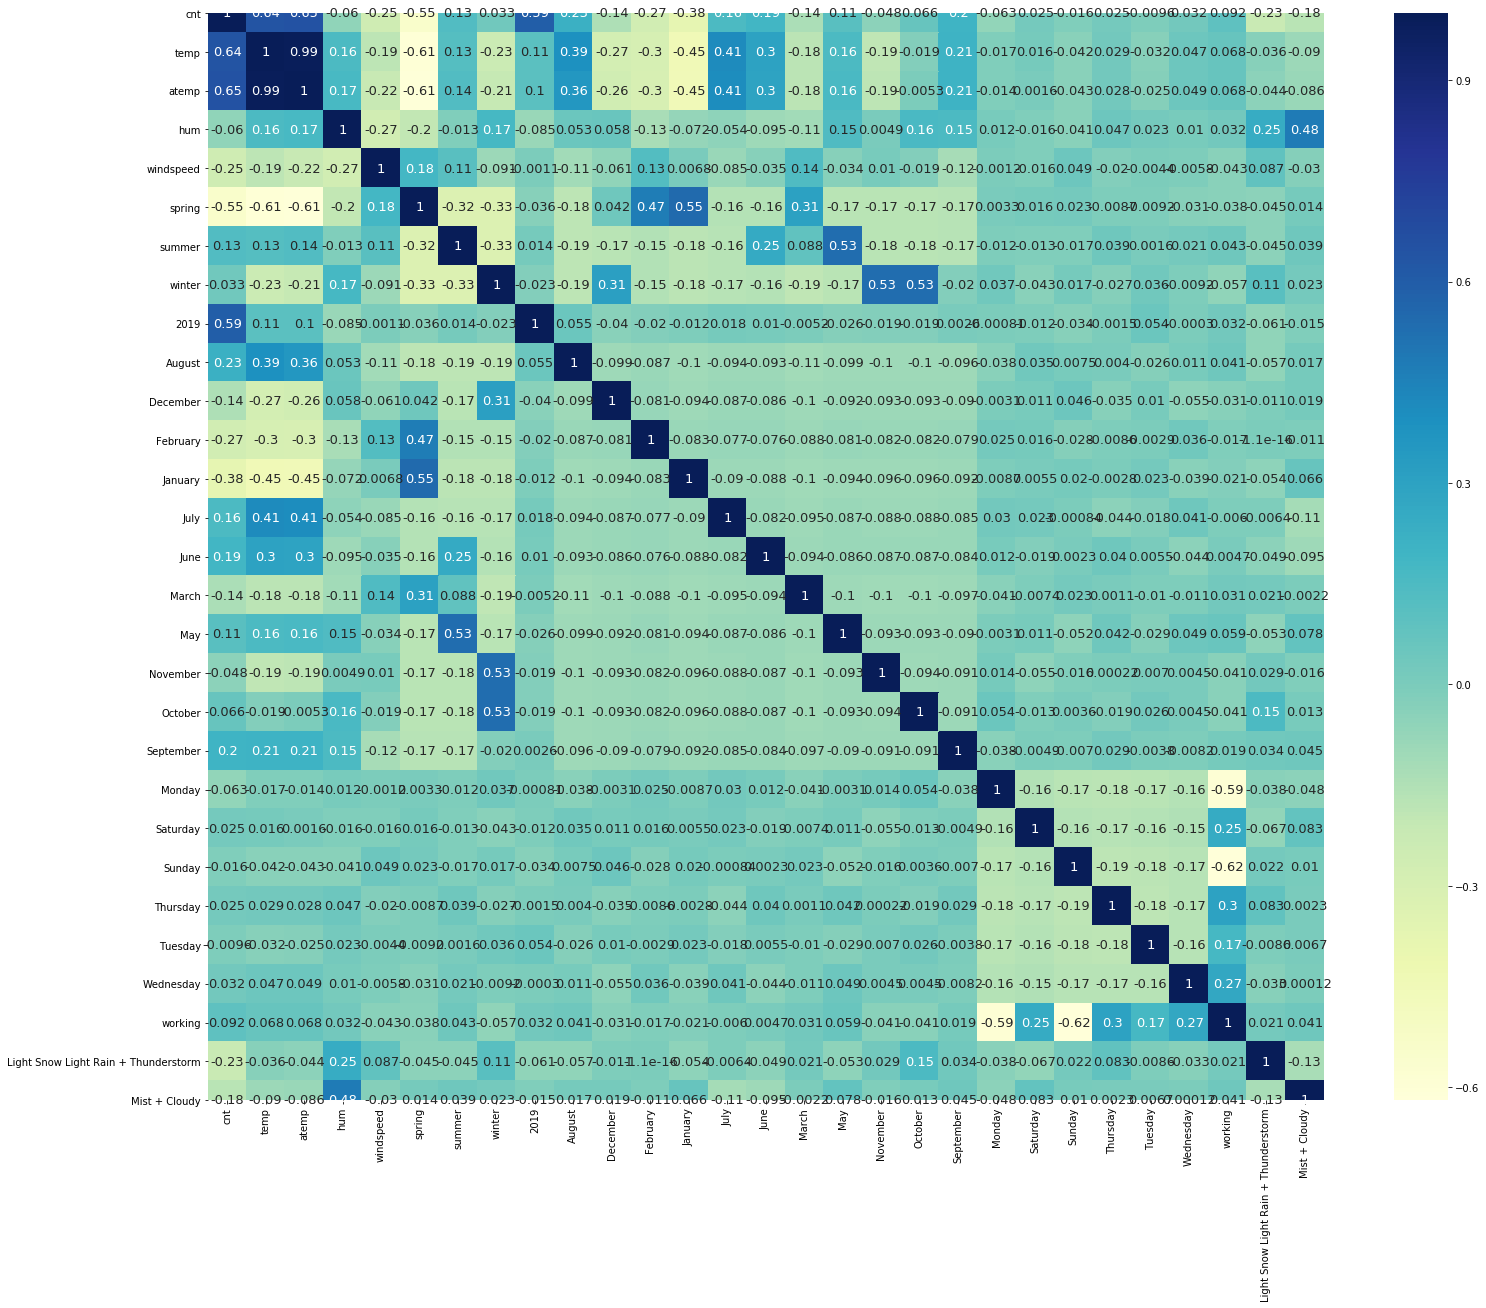

In [ ]:
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, annot_kws={"size": 13}, cmap="YlGnBu")
plt.show()

### Count is mostly corelated with temp and atemp

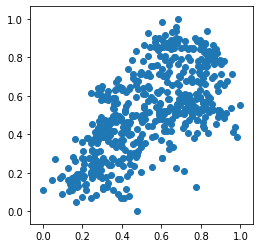

In [ ]:
plt.figure(figsize=[4,4])
plt.scatter(df_train['temp'], df_train['cnt'])
plt.show()

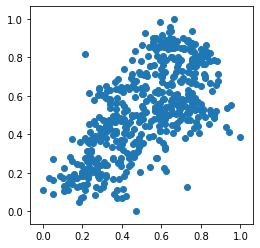

In [ ]:
plt.figure(figsize=[4,4])
plt.scatter(df_train['atemp'], df_train['cnt'])
plt.show()

### Building model
Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
df_train.shape

(510, 28)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 (2019, True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 10),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 8),
 ('Wednesday', False, 9),
 ('working', True, 1),
 ('Light Snow Light Rain + Thunderstorm', True, 1),
 ('Mist + Cloudy', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index([                                'temp',
                                        'hum',
                                  'windspeed',
                                     'spring',
                                     'summer',
                                     'winter',
                                         2019,
                                    'January',
                                       'July',
                                  'September',
                                     'Monday',
                                     'Sunday',
                                    'working',
       'Light Snow Light Rain + Thunderstorm',
                              'Mist + Cloudy'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [ ]:
X_train.columns

Index([                                'temp',
                                      'atemp',
                                        'hum',
                                  'windspeed',
                                     'spring',
                                     'summer',
                                     'winter',
                                         2019,
                                     'August',
                                   'December',
                                   'February',
                                    'January',
                                       'July',
                                       'June',
                                      'March',
                                        'May',
                                   'November',
                                    'October',
                                  'September',
                                     'Monday',
                                   'Saturday',
             

### Building model using statsmodel, for the detailed statistics : taking features that are selected by RFE approach

In [ ]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,temp,hum,windspeed,spring,summer,winter,2019,January,July,September,Monday,Sunday,working,Light Snow Light Rain + Thunderstorm,Mist + Cloudy
653,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,1,0,0
576,0.815169,0.725633,0.264686,0,0,0,1,0,1,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,1,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,1,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,1,0,0,1


In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe) #add constant

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.31e-191
Time:                        21:01:43   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### VIF : 
![image.png](attachment:image.png)
If VIF is high: this variable is strongly corelated with other variables used in the model.

In [ ]:
#check VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_VIF(xtrain) :    
    vif = pd.DataFrame()
    X = xtrain
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
calculate_VIF(X_train_rfe)

,Features,VIF
1,hum,32.81
0,temp,19.97
12,working,18.57
3,spring,5.04
11,Sunday,4.95
2,windspeed,4.92
10,Monday,4.79
5,winter,3.76
4,summer,3.03
14,Mist + Cloudy,2.31


### January : 0.048 p value

In [ ]:
X_train_rfe_drop_jan = X_train_rfe.drop(['January'], axis=1)

X_train_rfe_drop_jan_lm = sm.add_constant(X_train_rfe_drop_jan) #add constant
lm = sm.OLS(y_train,X_train_rfe_drop_jan_lm).fit()
print(lm.summary())

#X_train_rfe_dropatemp = X_train_rfe_dropatemp.drop(['const'], axis=1)
calculate_VIF(X_train_rfe_drop_jan)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.13e-191
Time:                        21:03:34   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


,Features,VIF
1,hum,32.14
0,temp,18.98
11,working,18.41
10,Sunday,4.91
2,windspeed,4.90
3,spring,4.80
9,Monday,4.76
5,winter,3.71
4,summer,3.03
13,Mist + Cloudy,2.31


### Monday : 0.028 p value

In [ ]:
X_train_rfe_drop_jan_mon = X_train_rfe_drop_jan.drop(['Monday'], axis=1)

X_train_rfe_drop_jan_mon_lm = sm.add_constant(X_train_rfe_drop_jan_mon) #add constant
lm = sm.OLS(y_train,X_train_rfe_drop_jan_mon_lm).fit()
print(lm.summary())

#X_train_rfe_drop_may = X_train_rfe_drop_may.drop(['const'], axis=1)
calculate_VIF(X_train_rfe_drop_jan_mon)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.51e-192
Time:                        21:05:40   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


,Features,VIF
1,hum,28.41
0,temp,16.87
10,working,4.71
2,windspeed,4.70
3,spring,4.18
5,winter,3.40
4,summer,2.83
12,Mist + Cloudy,2.28
6,2019,2.08
9,Sunday,1.84


###  Spring : 0.006 pvalue 

In [ ]:
X_train_rfe_drop_jan_mon_spring = X_train_rfe_drop_jan_mon.drop(['spring'], axis=1)

X_train_rfe_drop_jan_mon_spring_lm = sm.add_constant(X_train_rfe_drop_jan_mon_spring) #add constant
lm = sm.OLS(y_train,X_train_rfe_drop_jan_mon_spring_lm).fit()
print(lm.summary())

#X_train_rfe_drop_may_feb = X_train_rfe_drop_may_feb.drop(['const'], axis=1)
calculate_VIF(X_train_rfe_drop_jan_mon_spring)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.26e-191
Time:                        21:07:43   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


,Features,VIF
1,hum,16.23
0,temp,10.35
9,working,4.53
2,windspeed,3.73
11,Mist + Cloudy,2.10
5,2019,2.03
8,Sunday,1.79
3,summer,1.76
4,winter,1.71
6,July,1.55


### July : 0.014

In [ ]:
X_train_rfe_drop_jan_mon_spring_july = X_train_rfe_drop_jan_mon_spring.drop(['July'], axis=1)

X_train_rfe_drop_jan_mon_spring_july_lm = sm.add_constant(X_train_rfe_drop_jan_mon_spring_july) #add constant
lm = sm.OLS(y_train,X_train_rfe_drop_jan_mon_spring_july_lm).fit()
print(lm.summary())

#X_train_rfe_drop_may_feb_mon = X_train_rfe_drop_may_feb_mon.drop(['const'], axis=1)
calculate_VIF(X_train_rfe_drop_jan_mon_spring_july)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.89e-191
Time:                        21:09:06   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


,Features,VIF
1,hum,15.98
0,temp,8.12
8,working,4.53
2,windspeed,3.73
10,Mist + Cloudy,2.10
5,2019,2.02
7,Sunday,1.79
4,winter,1.66
3,summer,1.58
6,September,1.20


### All variables are significant but we have high VIF for 'hum', let's drop it and see : FINAL MODEL

In [ ]:
X_train_rfe_drop_jan_mon_spring_july_hum = X_train_rfe_drop_jan_mon_spring_july.drop(['hum'], axis=1)

X_train_rfe_drop_jan_mon_spring_july_hum_lm = sm.add_constant(X_train_rfe_drop_jan_mon_spring_july_hum) #add constant

lm_final = sm.OLS(y_train, X_train_rfe_drop_jan_mon_spring_july_hum_lm).fit()
print(lm_final.summary())

#X_train_rfe_drop_may_feb_mon_hum = X_train_rfe_drop_may_feb_mon_hum.drop(['const'], axis=1)
calculate_VIF(X_train_rfe_drop_jan_mon_spring_july_hum)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.47e-188
Time:                        21:12:33   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


,Features,VIF
0,temp,4.76
7,working,4.04
1,windspeed,3.43
4,2019,2.02
6,Sunday,1.69
2,summer,1.57
9,Mist + Cloudy,1.53
3,winter,1.40
5,September,1.20
8,Light Snow Light Rain + Thunderstorm,1.08


### The r-squared dropped to 0.836 from 0.842, but the VIFs have been improved. 

### Residual Analysis of the train data :

In [ ]:
y_train_cnt = lm_final.predict(X_train_rfe_drop_jan_mon_spring_july_hum_lm)

Text(0.5, 0, 'Errors')

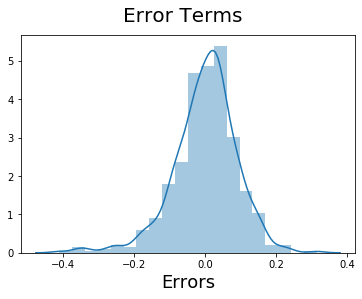

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### y_train and y_train_pred : regression plot

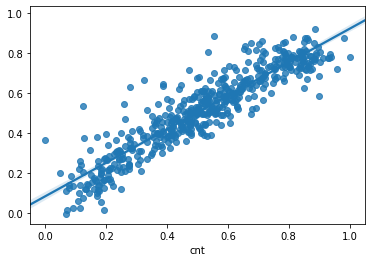

In [ ]:
ax = sns.regplot(x=y_train, y=y_train_cnt)

### Making Predictions Using the Final Model
Applying the scaling on the test sets

In [ ]:
print(df_test.shape)
cnt_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[cnt_vars] = scaler.transform(df_test[cnt_vars])
df_test.describe()

(219, 29)


,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,August,...,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working,Light Snow Light Rain + Thunderstorm,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,...,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.698630,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,...,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.459904,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [ ]:
df_test.columns

Index([                                'temp',
                                      'atemp',
                                        'hum',
                                  'windspeed',
                                        'cnt',
                                     'spring',
                                     'summer',
                                     'winter',
                                         2019,
                                     'August',
                                   'December',
                                   'February',
                                    'January',
                                       'July',
                                       'June',
                                      'March',
                                        'May',
                                   'November',
                                    'October',
                                  'September',
                                     'Monday',
             

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test_m = sm.add_constant(X_test)

In [ ]:
X_train_rfe_drop_jan_mon_spring_july_hum_lm.columns

Index([                               'const',
                                       'temp',
                                  'windspeed',
                                     'summer',
                                     'winter',
                                         2019,
                                  'September',
                                     'Sunday',
                                    'working',
       'Light Snow Light Rain + Thunderstorm',
                              'Mist + Cloudy'],
      dtype='object')

In [ ]:
# Creating X_test_final dataframe by dropping variables from X_test_m
X_test_m = X_test_m.drop(['hum', 'atemp', 'Monday','February','May','August','June','July','March','October','Saturday',
                         'Thursday','Tuesday','Wednesday','spring','December','January','November'], axis = 1)

In [ ]:
# Making predictions using the final model
y_pred = lm_final.predict(X_test_m)

### Model Evaluation

Text(0, 0.5, 'y_pred')

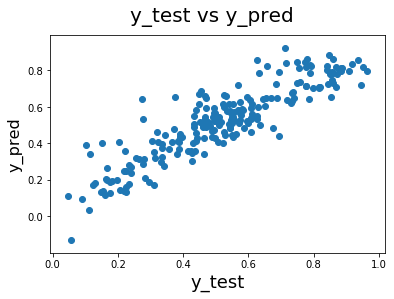

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Regression plot : y_test and y_pred

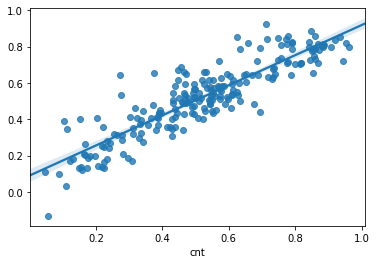

In [ ]:
ax = sns.regplot(x=y_test, y=y_pred)

In [ ]:
print(lm_final.params)
len(lm_final.params)

const                                   0.075325
temp                                    0.549936
windspeed                              -0.155238
summer                                  0.087429
winter                                  0.131826
2019                                    0.233056
September                               0.097236
Sunday                                  0.067688
working                                 0.056323
Light Snow Light Rain + Thunderstorm   -0.288021
Mist + Cloudy                          -0.081347
dtype: float64


11

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, y_train_cnt)

0.8357769866151917

In [ ]:
r2_score(y_test, y_pred)

0.7955844377237248

In [ ]:
(r2_score(y_train, y_train_cnt))-(r2_score(y_test, y_pred))

0.04019254889146695